In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing and Cleaning data

One of the first step in data analysis is importing the data and preparing it for further processing. Basically preparing includes converting the raw data into usable format, modifying certain fields and performing some cleaning task.

In [2]:
df = pd.read_csv('cnet_data.csv')
df.columns

Index(['title', 'link', 'published_date'], dtype='object')

In [3]:
df.head()

,title,link,published_date
0,E-tailers may be stuck with shipping costs,https://www.cnet.com/news/e-tailers-may-be-stu...,1999-12-31
1,Tech CEOs add billions to their wealth in 1999,https://www.cnet.com/news/tech-ceos-add-billio...,1999-12-31
2,Short Take: EMC appoints Tucci to COO,https://www.cnet.com/news/short-take-emc-appoi...,1999-12-31
3,Short Take: Quake III Arena for Linux,https://www.cnet.com/news/short-take-quake-iii...,1999-12-31
4,Gateway unloads Amiga name,https://www.cnet.com/news/gateway-unloads-amig...,1999-12-31


We have 3 fields: `title`, `link` and `published_date`. Let's convert the `published_date` field to a `datetime` object so that it will easy for us to manipulate later in our analysis.

In [4]:
df['published_date'] = pd.to_datetime(df.published_date, format='%Y-%m-%d')

One of the common problem with data is they do have some empty or null values. Depending on the nature of data, we can either remove those rows or fill in some values.

In [5]:
df.isnull().any()

title              True
link              False
published_date    False
dtype: bool

We do have some posts that do not have title.

In [6]:
df[df['title'].isnull()]

,title,link,published_date
39015,NaN,https://www.cnet.com/news/-1-2-3-4-5-6-7-8-9-1...,2005-10-26
48544,NaN,https://www.cnet.com/news/-1-2-3-4-5-6-7-8-9-1...,2005-10-12
99274,NaN,https://www.cnet.com/news/-1-2-3-4-5-6-7-8-9-1...,2007-10-16
107950,NaN,https://www.cnet.com/news/null/,1996-02-22
128849,NaN,https://www.cnet.com/news/-1-2-3-4-5-6-7-8-9-1...,2005-05-24
138891,NaN,https://www.cnet.com/news/-1-2-3-4-5-6-7-8-9-1...,2005-05-05
207057,NaN,https://www.cnet.com/news/null-1-2/,2000-04-04
207129,NaN,https://www.cnet.com/news/-1-2-3-4-5-6/,2000-04-04
210297,NaN,https://www.cnet.com/news/null-1/,2000-03-29
233815,NaN,https://www.cnet.com/news/-1-2-3/,2001-01-29


Since these rows are not useful for our analysis, we can just remove them from our dataframe.

In [7]:
df = df[pd.notnull(df['title'])]
df.isnull().any()

title             False
link              False
published_date    False
dtype: bool

All the null values has been removed and we have the data ready for analysis.

# Analysis

In [8]:
total = len(df) # Total number of records
total

356648

# Article Published by Year

In [9]:
df.groupby(df.published_date.dt.year)['title'].count()

published_date
1995      428
1996     4831
1997     8506
1998     9027
1999    10530
2000    12925
2001    12739
2002     8500
2003     7690
2004     7880
2005     9061
2006    11048
2007    19053
2008    26737
2009    41634
2010    18913
2011    22745
2012    25007
2013    21524
2014    16874
2015    12317
2016    14857
2017    12767
2018    15483
2019     5572
Name: title, dtype: int64

We can see the number of articles published every year. The highest number of article published in a year is 2009 with 41634 and the lowest is in 1995 with just 428. Let's visualize the data through a graph.

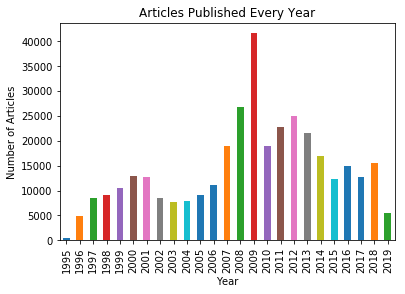

In [10]:
ax = df.groupby(df.published_date.dt.year)['title'].count().plot(kind='bar')
ax.set(xlabel='Year', ylabel='Number of Articles', title="Articles Published Every Year")
plt.show()

# Article Published by Month

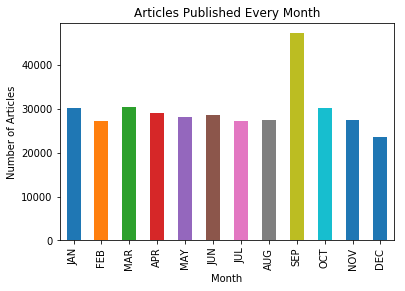

In [11]:
ax = df.groupby(df.published_date.dt.month)['title'].count().plot(kind='bar')
months = ['JAN',  'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax.set_xticklabels(months)
ax.set(xlabel='Month', ylabel='Number of Articles', title="Articles Published Every Month")
plt.show()

We can plot a similar graph for months. September witnesses the highest number of articles published that too by a healthy margin. All other months have almost equal number of article published, with December being the lowest.

# Article Published by Day of Week

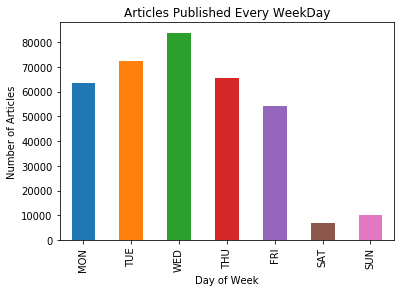

In [12]:
ax = df.groupby(df.published_date.dt.weekday)['title'].count().plot(kind='bar')
days_of_week = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
ax.set_xticklabels(days_of_week)
ax.set(xlabel='Day of Week', ylabel='Number of Articles', title="Articles Published Every WeekDay")
plt.show()

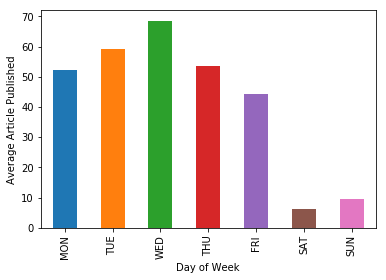

In [13]:
day_of_week = df.groupby(df['published_date'].dt.dayofweek).published_date
ax = (day_of_week.count()/day_of_week.unique().apply(len)).plot(kind='bar')
ax.set_xticklabels(days_of_week)
ax.set(xlabel='Day of Week', ylabel='Average Article Published')
plt.show()

As predicted, the lowest number of articles published are on weekends. Wednesday sees the highest number of articles published with over 80K articles in total and nearly 70 articles on average.

# Weekdays vs Weekends

In [14]:
def is_weekend(row):
    ''' Returns True if weekend else False '''
    return (row.dayofweek == 5 or row.dayofweek == 6)

df['weekend'] = df['published_date'].apply(is_weekend) # adds a new column with value 1 or 0 specifying weekend

In [15]:
print('Total articles published on weekend =', df[df['weekend']==1]['weekend'].count())
print('Total articles published on weekdays =', df[df['weekend']==0]['weekend'].count())

print('Percentage of articles published on weekend =', df[df['weekend']==1]['weekend'].count()/total*100)
print('Percentage of articles published on weekdays =', df[df['weekend']==0]['weekend'].count()/total*100)

Total articles published on weekend = 16994
Total articles published on weekdays = 339654
Percentage of articles published on weekend = 4.7649222763060495
Percentage of articles published on weekdays = 95.23507772369395


Exploring further, we can see over 95% of the articles are published on weekdays.

# Article Published by Date

In [16]:
df['published_date'].value_counts().head(10)

2009-09-02    15973
2009-09-01     3579
2008-12-05      963
2000-11-30      368
2000-10-12      302
2012-03-20      269
2011-11-22      258
2014-03-27      210
2011-11-23      191
2012-07-19      189
Name: published_date, dtype: int64

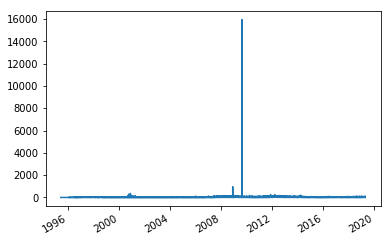

In [17]:
df['published_date'].value_counts().plot()

This seems a bit weird. The highest number of articles pubished in a single day is 15973 on Sep-02-2009. For a clearer picture of the distribution of articles, let's remove the top 5 values and plot again.

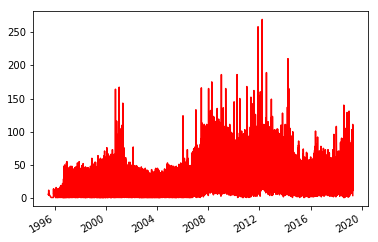

In [18]:
df['published_date'].value_counts()[5:].plot(color='red')

In [19]:
df['published_date'].value_counts().mean(), df['published_date'].value_counts().median()

(43.03185328185328, 37.0)

Looking at the graph and numbers, we can conclude that around 40 articles get published everyday.

In [20]:
print('Weekend mean =', df[df['weekend']==1]['published_date'].value_counts().mean())
print('Weekend median =', df[df['weekend']==1]['published_date'].value_counts().median())

Weekend mean = 7.824125230202578
Weekend median = 6.0


In [21]:
print('Weekdays mean =', df[df['weekend']==0]['published_date'].value_counts().mean())
print('Weekdays median =', df[df['weekend']==0]['published_date'].value_counts().median())

Weekdays mean = 55.535317200784824
Weekdays median = 47.0


# Wordcloud

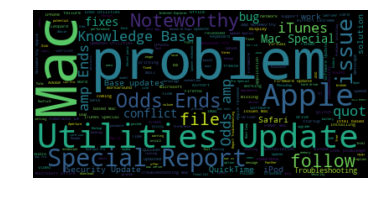

In [22]:
from wordcloud import WordCloud
stopwords = set(open('stopwords.txt').read().split(','))
wc = WordCloud(stopwords=stopwords)
wordcloud = wc.generate(' '.join(df[df.published_date=='2009-09-02']['title'].apply(str)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The above wordcloud shows Apple being dominant in the news on September 02, 2009. We can do the same for a respective year as below.

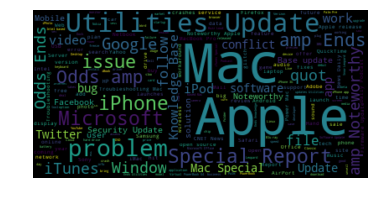

In [23]:
wordcloud = wc.generate(' '.join(df[df.published_date.dt.year==2009]['title'].apply(str)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

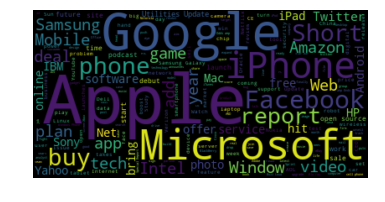

In [24]:
wordcloud = wc.generate(' '.join(df['title'].apply(str)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

As expected, the headlines are dominated by tech giants like Google, Apple, Microsoft and Facebook. There are other notable companies like Sony, Intel, Samsung and HP.

# Keyword Occurences

In [25]:
df[df['title'].str.contains('microsoft|apple|facebook|google|amazon', case=False)].title.count()

52670

52596 articles feature one of Microsoft, Apple, Facebook, Amazon and Google.

In [26]:
keywords = ['microsoft', 'apple', 'facebook', 'google', 'amazon', 
            'twitter', 'ibm', 'iphone', 'android', 'window', 'ios']
for kw in keywords:
    count = df[df['title'].str.contains(kw, case=False)].title.count()
    print('{} found {} times'.format(kw, count))

microsoft found 12918 times
apple found 17762 times
facebook found 6342 times
google found 13409 times
amazon found 4162 times
twitter found 3340 times
ibm found 3178 times
iphone found 11543 times
android found 5801 times
window found 6063 times
ios found 3199 times


In [27]:
netflix_before_2009 = df[(df['title'].str.contains('netflix', case=False)) & 
                         (df.published_date.dt.year <= 2009)].title.count()
netflix_after_2009 = df[(df['title'].str.contains('netflix', case=False)) & 
                        (df.published_date.dt.year > 2009)].title.count()
print(netflix_before_2009, netflix_after_2009)

170 1409


Interestingly Netflix, a company founded in 1997 is only mentioned 170 until 2009 while it has been headlined 1409 after 2009. This shows its increasing dominance as a tech company.